In [39]:
import nltk
from nltk.stem import WordNetLemmatizer
import json
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
import random
import matplotlib.pyplot as plt

Import and load the data file

In [40]:
data_file = open('intents2_mh.json').read()
intents = json.loads(data_file)

Initialize lemmatizer

In [41]:
lemmatizer = WordNetLemmatizer()

Preprocess data

In [42]:
words = []
documents = []
classes = []
ignore_words = ['?', '!']

Tokenize patterns and create lists of words, documents, and classes

In [43]:
for intent in intents['intents']:
    for pattern in intent['patterns']:
        w = nltk.word_tokenize(pattern)
        words.extend(w)
        documents.append((w, intent['tag']))
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

Lemmatize words and remove duplicates

In [44]:
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))
classes = sorted(list(set(classes)))

In [45]:
print(len(documents), 'documents')
print(len(classes), 'classes', classes)
print(len(words), 'unique lemmatized words', words)

180 documents
60 classes ['addiction_support', 'anger_management', 'animal_assisted_therapy', 'anxiety_coping_strategies', 'anxiety_relief', 'art_therapy', 'body_positivity', 'boundaries_setting', 'breathing_exercises', 'career_counseling', 'coping_strategies', 'creativity_expression', 'depression_support', 'eating_disorder_recovery', 'elderly_mental_health', 'emotional_regulation', 'farewell', 'financial_wellness', 'goal_setting', 'goal_setting_tips', 'gratitude', 'greeting', 'guided_relaxation', 'healthy_lifestyle', 'journaling_benefits', 'loneliness', 'medication_management', 'meditation_guidance', 'mind-body_connection', 'mindful_eating', 'mindful_walking', 'mindfulness_apps', 'mindfulness_in_children', 'mindfulness_practices', 'music_therapy', 'online_therapy', 'parenting_support', 'positive_self_talk', 'procrastination_help', 'progressive_muscle_relaxation', 'relationship_building_tips', 'relationship_issues', 'resilience_building', 'seeking_help', 'self_affirmation', 'self_care_

Create training data

In [46]:
# Create training data
training = []
output_empty = [0] * len(classes)
for doc in documents:
    bag = []
    pattern_words = doc[0]
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1
    training.append([bag, output_row])

random.shuffle(training)
training = np.array(training)
x_train = list(training[:, 0])
y_train = list(training[:, 1])
print("Training data created")
print("Training data shape", training.shape)

Training data created
Training data shape (180, 2)


C:\Users\PC\AppData\Local\Temp\ipykernel_16196\2061277746.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  training = np.array(training)


Split the data into training and validation

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


Build the model

In [49]:
from keras.optimizers import SGD

learning_rate = 0.01
batch_size = 64

model = Sequential()
model.add(Dense(128, input_shape=(len(x_train[0]),), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(y_train[0]), activation='softmax'))




Compile model

In [50]:
sgd = SGD(lr=learning_rate, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

Fitting the model and storing history

In [51]:
history = model.fit(np.array(x_train), np.array(y_train), epochs=1000, batch_size=batch_size, verbose=1, validation_split=0.1)

Epoch 1/1000


3/3 [==============================] - 1s 98ms/step - loss: 4.1057 - accuracy: 0.0155 - val_loss: 4.0981 - val_accuracy: 0.0000e+00
Epoch 2/1000
3/3 [==============================] - 0s 24ms/step - loss: 4.1373 - accuracy: 0.0155 - val_loss: 4.1032 - val_accuracy: 0.0000e+00
Epoch 3/1000
3/3 [==============================] - 0s 24ms/step - loss: 4.1116 - accuracy: 0.0000e+00 - val_loss: 4.1079 - val_accuracy: 0.0000e+00
Epoch 4/1000
3/3 [==============================] - 0s 24ms/step - loss: 4.1276 - accuracy: 0.0310 - val_loss: 4.1147 - val_accuracy: 0.0000e+00
Epoch 5/1000
3/3 [==============================] - 0s 35ms/step - loss: 4.1171 - accuracy: 0.0000e+00 - val_loss: 4.1164 - val_accuracy: 0.0000e+00
Epoch 6/1000
3/3 [==============================] - 0s 39ms/step - loss: 4.1012 - accuracy: 0.0155 - val_loss: 4.1155 - val_accuracy: 0.0000e+00
Epoch 7/1000
3/3 [==============================] - 0s 30ms/step - loss: 4.0905 - accuracy: 0.0310 - val_loss: 4.1151 - val_accuracy: 0

In [52]:
model.save("VANILLA_RNN_model_3.h5")

Plotting training history

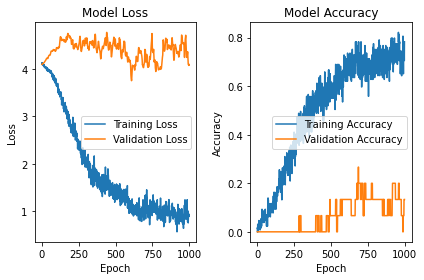

In [53]:
# Plot Training and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Training and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [54]:
# Print final metrics
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]

print(f'Final Training Loss: {final_train_loss}')
print(f'Final Validation Loss: {final_val_loss}')
print(f'Final Training Accuracy: {final_train_acc}')
print(f'Final Validation Accuracy: {final_val_acc}')

Final Training Loss: 0.9054219722747803
Final Validation Loss: 4.081351280212402
Final Training Accuracy: 0.7829457521438599
Final Validation Accuracy: 0.13333334028720856


User interaction

In [56]:
from keras.models import load_model

model = load_model("VANILLA_RNN_model_3.h5")

while True:
    # Get user input
    input_text = input('You: ')
    if input_text.lower() == 'quit':
        break

    print(input_text)

    # Tokenize and preprocess user input
    input_words = nltk.word_tokenize(input_text)
    input_words = [lemmatizer.lemmatize(word.lower()) for word in input_words]

    # Create bag of words
    input_bag = [0] * len(words)
    for w in input_words:
        if w in words:
            input_bag[words.index(w)] = 1

    # Predict intent
    results = model.predict(np.array([input_bag]))[0]
    # Get the most probable class
    result_index = np.argmax(results)
    tag = classes[result_index]

    # Get a random response from the associated tag
    for intent in intents['intents']:
        if intent['tag'] == tag:
            responses = intent['responses']
            print('Bot:', random.choice(responses))
            break

When is it appropriate to express gratitude?
1/1 [==============================] - 0s 72ms/step
Bot: Anytime!
What strategies help alleviate anxiety?
1/1 [==============================] - 0s 33ms/step
Bot: Practice grounding techniques.
i need to overcome my loneliness, what should i do?
1/1 [==============================] - 0s 37ms/step
Bot: Focus on your breathing.
i need to do meditation, can you tell me?
1/1 [==============================] - 0s 26ms/step
Bot: Start with deep breathing and focus on the present moment.
i have to deal with my relationship, can you help me?
1/1 [==============================] - 0s 35ms/step
Bot: Seek couples or family therapy to address underlying issues.
practice grounding
1/1 [==============================] - 0s 22ms/step
Bot: Mindful eating can help improve digestion, prevent overeating, and cultivate a healthier relationship with food.


KeyboardInterrupt: Interrupted by user